The Adult Census Income dataset, often referred to as the "Adult" dataset contains a collection of demographic and socioeconomic information about individuals, with the main goal being to predict whether an individual's annual income exceeds $50,000 based on the given features.

## Dataset Description

This data was extracted from the 1994 Census bureau database. The dataset contains various factors that decide the income of a person.

* age: Age of person
* workclass:	Workclass of person
* fnlwgt: Final weight
* education:	Education Degree of person
* education.num:	Number of years of education
* marital.status:	Marital status of person
* occupation: Occupation of person
* relationship: Relationship of person
* capital.gain: capital gain of person
* capital.loss: Capital loss of person
* hours.per.week: Number of hours per week
* native.country: Native country of person
* income:	Income category of person

Scenario:

You are a machine learning engineer at XYZ Analytics, a data science consulting firm. A large retail company named RetailCo has approached you to help them build a classification model to predict whether their customers' income is above or below $50,000 per year. The goal is to use this model to better understand their customer demographics and tailor marketing strategies accordingly. RetailCo wants you to compare the performance of different classification algorithms, including K-Nearest Neighbors (KNN), Naive Bayes, Random Forest, Logistic Regression Classifier, SVM, and Decision Tree Classifier.





Directions:



1. Data Preprocessing: Clean and preprocess the dataset, handling missing values and encoding categorical variables.

- There are some ‘?’ instead of values in all columns. Treat them by replacing with the mode values.

- Use fillna().

2. Feature Engineering: Create new features if relevant and apply feature scaling.

3. Exploratory Data Analysis (EDA): Visualize the distribution of income levels and relationships between features and income.

- Fix the imbalanced dataset by oversampling method.

- Use RandomOverSampler from imblearn.over_sampling.  

- Fit the splitted data using fit().

4. Model Selection and Training: Choose KNN, Naive Bayes, and Random Forest as classification algorithms and train them on the data.

- Import the models from sklearn.linear_model, sklearn.neighbor, sklearn.svm, sklearn.naive_bayes, sklearn.tree, and sklearn.ensemble library.

- Use .fit() to fit the training data.

5. Model Evaluation: Evaluate model accuracy and F1-score.

- Import the models from sklearn.metrics.

- Hyperparameter Tuning: Optimize model hyperparameters for improved performance.

6. Model Comparison and Insights: Compare algorithm performance and provide insights on strengths and weaknesses.

7. Visualization and Reporting: Create visualizations and a comprehensive report for RetailCo.

- Use classification_report from sklearn.metrics.

8. Final Model Deployment: Train the selected model on the full dataset and provide RetailCo with the finalized model.

By achieving this objective, RetailCo will be able to make informed decisions based on customer income levels, leading to more targeted and effective marketing campaigns.

1. Load libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# TODO
# Import the 'adult.csv' dataset
dataset = pd.read_csv("adult.csv")

In [4]:
# Preview datasetM
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32561 Columns: 15


In [6]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


2.	Check for null values and ? in any columns and handle those values. Check the distribution of target variable income and identify if the dataset is balanced.

In [8]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [9]:
# TODO
# Check for '?' in dataset and treat them by replacing with the mode values.



In [10]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>

3.	Perform below Univariate analysis

Create a barplot for column income

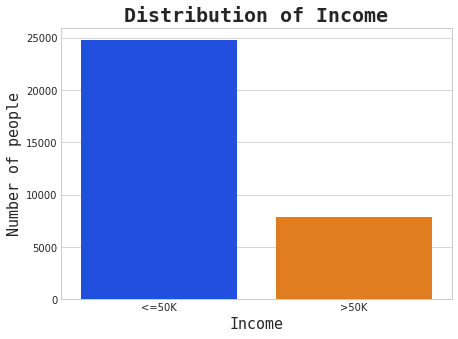

In [11]:
# Creating a barplot for 'Income'
income = dataset['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x = income.index, y = income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

#### Observation
- The bar plot shows that two classes are highly imbalanced
- The class <=50k is the majority class

Create a distribution plot for column age

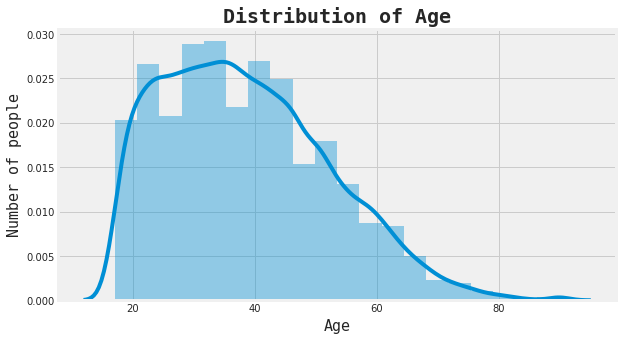

In [12]:
# Creating a distribution plot for 'Age'
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

#### Observation
- The distribution plot shows that people at the age around 30 are the majority
- There are very entries for senior aged people

Create a barplot for column education

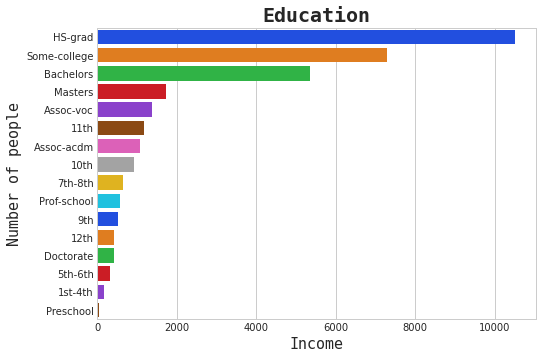

In [13]:
# TODO
edu = dataset['education'].value_counts()
# Create and display a barplot for 'Education' using Seaborn, where the x-axis represents the count of people with each education level (edu.values), and the y-axis represents the different education categories (edu.index).
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x = edu.values, y = edu.index, palette='bright')
plt.title('Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

#### Observation
- The bar plot shows most of the people are HS-grad
- Second largest count goes to Some-College and followed by Bachelors and Masters

Create a barplot for Years of Education. Use column education.num

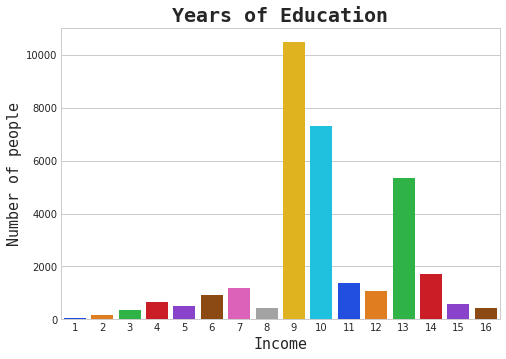

In [14]:
# TODO
edu_num = dataset['education.num'].value_counts()
# Create and display a barplot for 'Years of Education' using the Seaborn library to visualize the distribution of years of education where, x = edu_num.index represents the unique education levels, and y = edu_num.values represents the corresponding counts.
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x = edu_num.index, y = edu_num.values, palette='bright')
plt.title('Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

#### Observation
- The bar plot shows that most of the people are with years of education 9 Years

Create a pie chart for Marital status. Use column marital.status

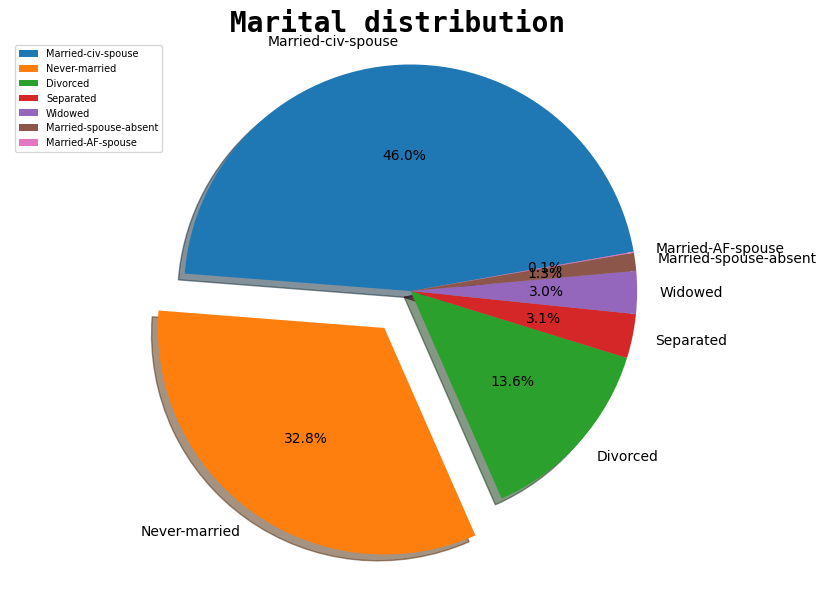

In [15]:
# Creating a pie chart for 'Marital status'
marital = dataset['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

#### Observation
- The pie chart shows that 46% of the people are married
- The second largest set people are un married which counts to 32.8%

Create a barplot for column Hours per week

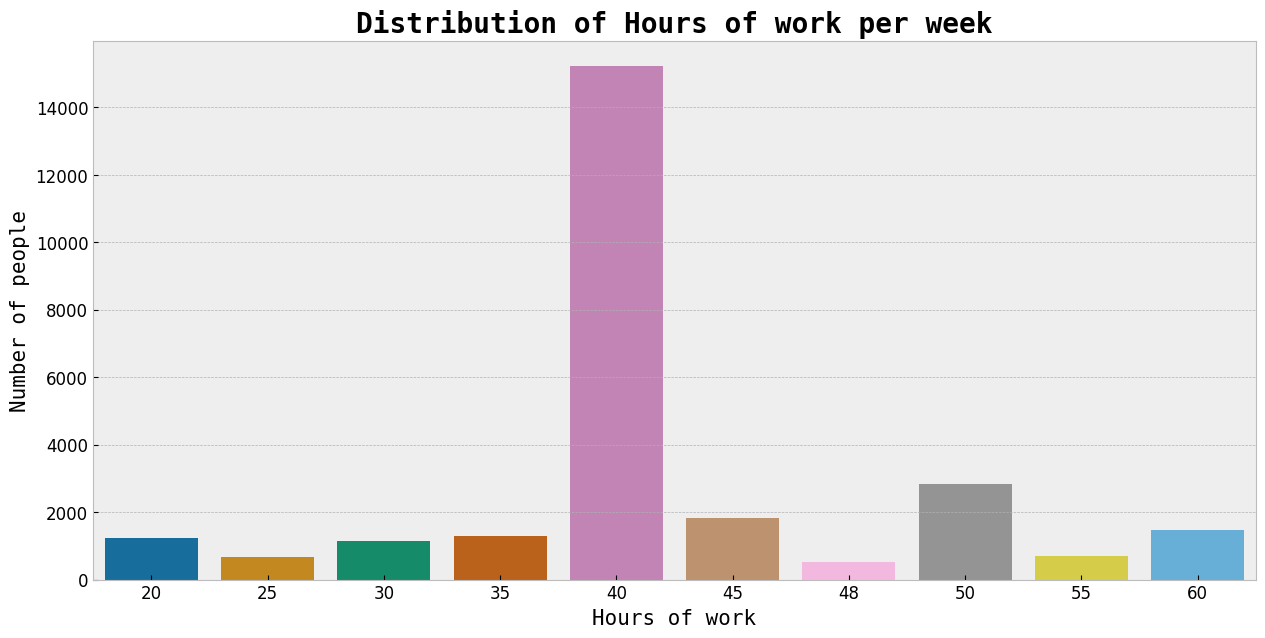

In [16]:
# Creating a barplot for 'Hours per week'
hours = dataset['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x = hours.index, y = hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

#### Observation
- The Hours of Work bar plot shows that most of the people are working for 40 hours in a week
- There are people who work for 60 hours a week too.

4. Perform below Bivariate analysis

Create a countplot of income across column age

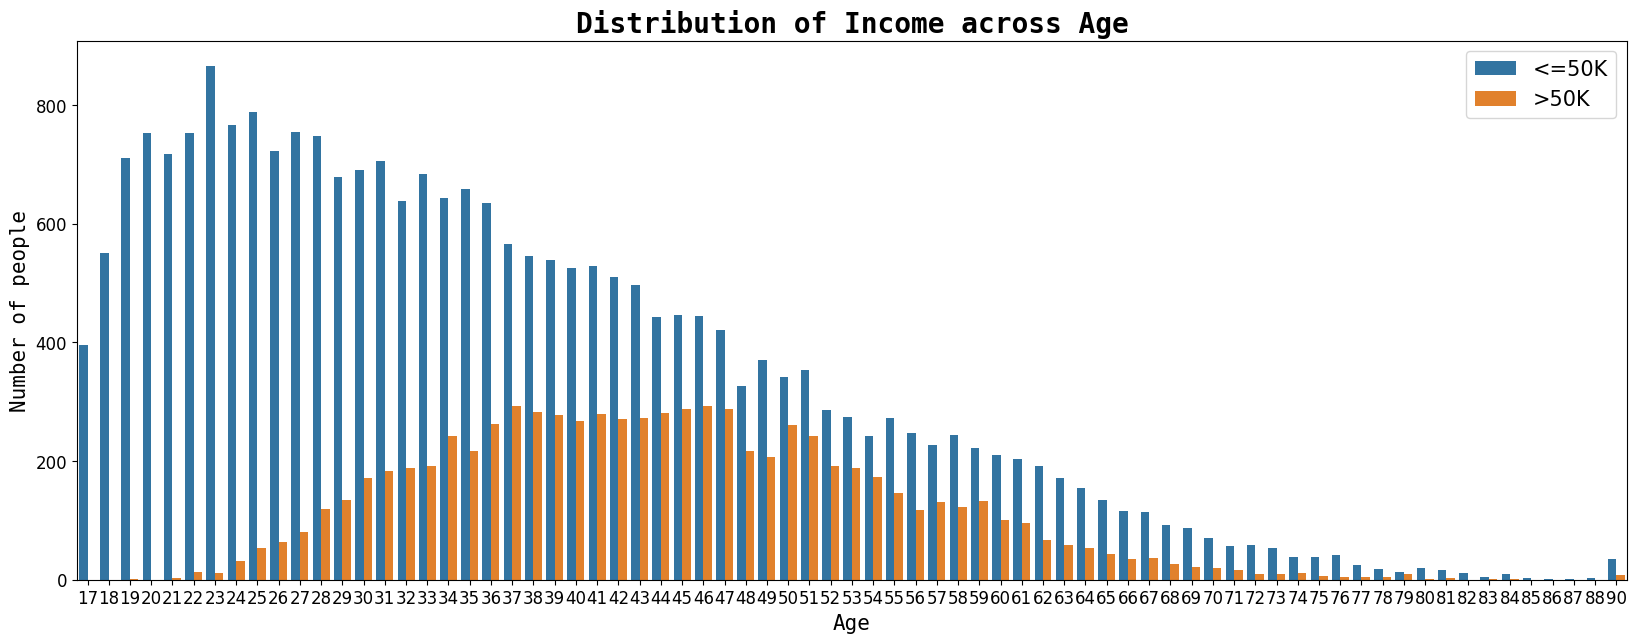

In [17]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['age'], hue=dataset['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

#### Observation
- The count plot of income versus age shows that most of the people of age <30 are earning <=50k
- The people between the age of 30 and 65 are paid >50k

Create a countplot of income across column education

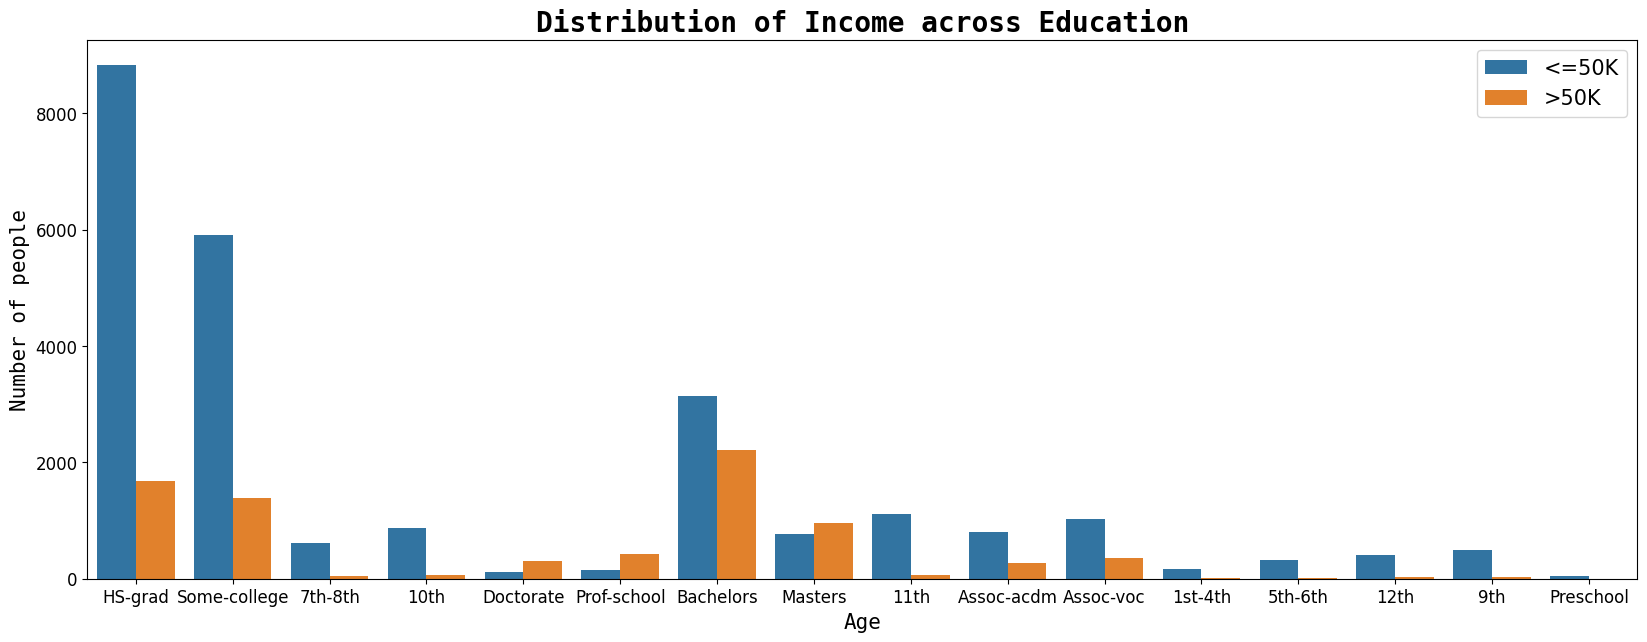

In [18]:
# TODO
# Create and display countplot of income across education using Seaborn, where 'education' is plotted on the x-axis, and the count is represented by the height of the bars. The bars are colored based on the 'income' variable.
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['education'], hue=dataset['income'])
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

#### Observation
- The countplot of income across column education shows the various set of people with different education and their salary level <=50k or >50k
- As we had seen earlier, most of the people have done education HS-grad level

Create a countplot of income across column years of education

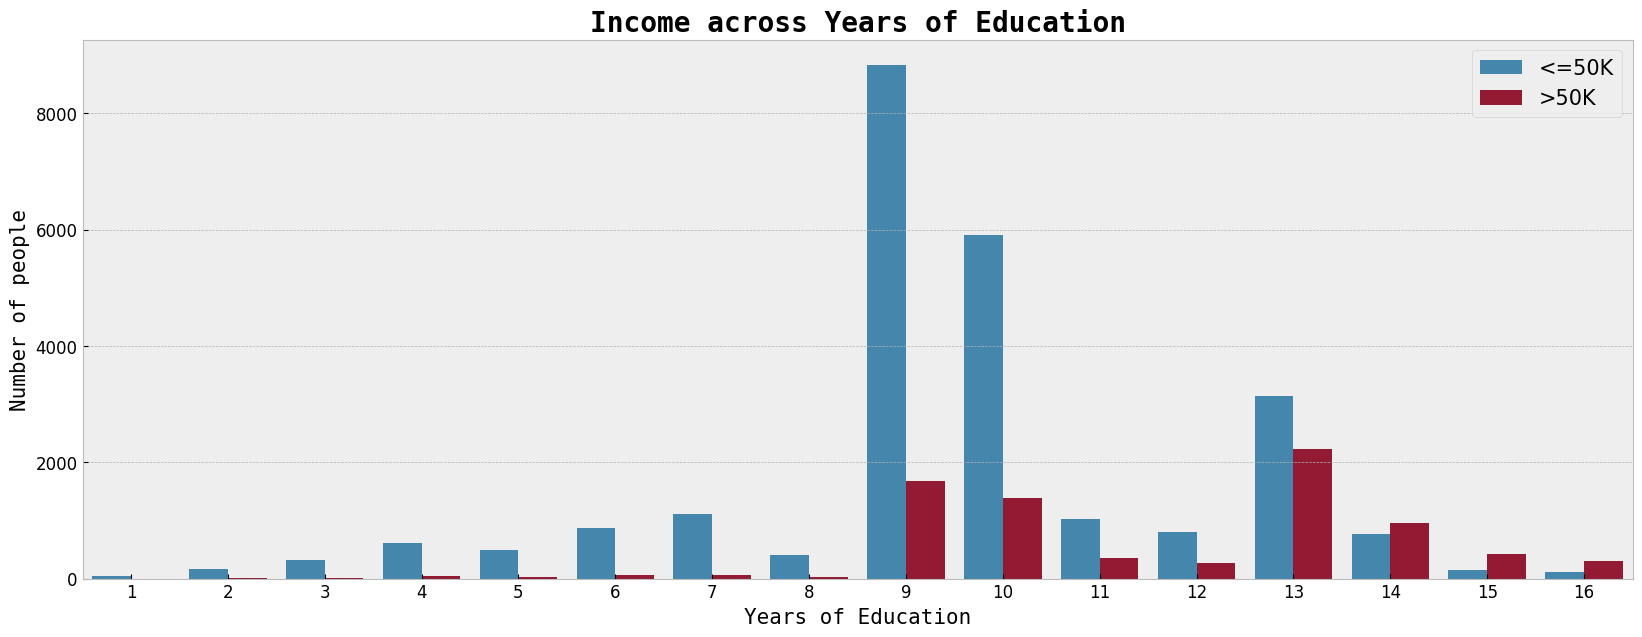

In [19]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['education.num'],
              hue=dataset['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

#### Observation
- The countplot of income across column years of education shows most of the people are with 9 years of education
- The plot also shows that most of the people who are paid >50k have done 13 years of education

Create a countplot of income across column Marital Status

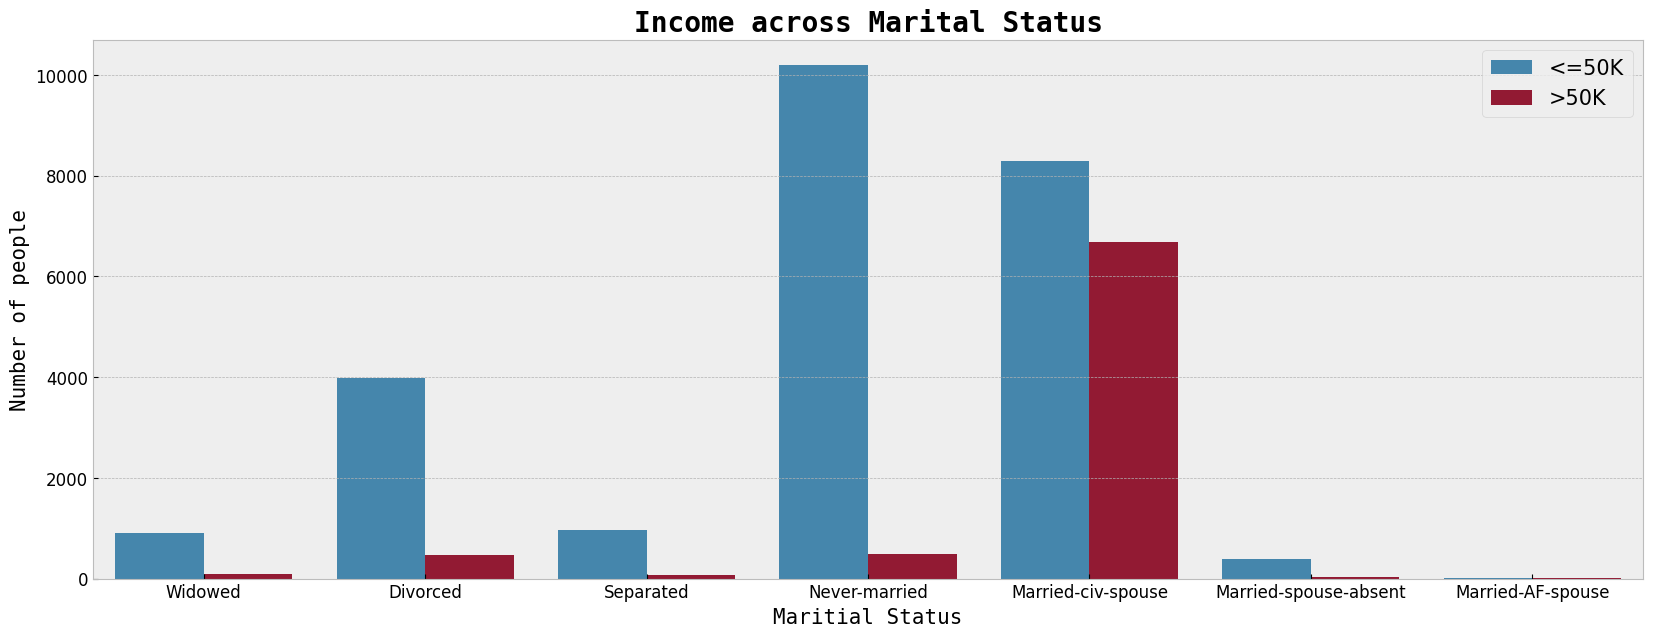

In [20]:
# TODO
# Use the Seaborn library to create and display a countplot to visualize the distribution of income across different marital statuses where the x-axis represents the marital status categories, and the bars are colored based on income (e.g., differentiating between those with high and low income).
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['marital.status'],
              hue=dataset['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Maritial Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()


#### Observation
- The countplot of income across marital status shows the distribution of people with salary <=50k and >50k across their Marital status

Draw a heatmap of data correlation and find out the columns to which income is highly correlated

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
dataset['income'] = le.fit_transform(dataset['income'])

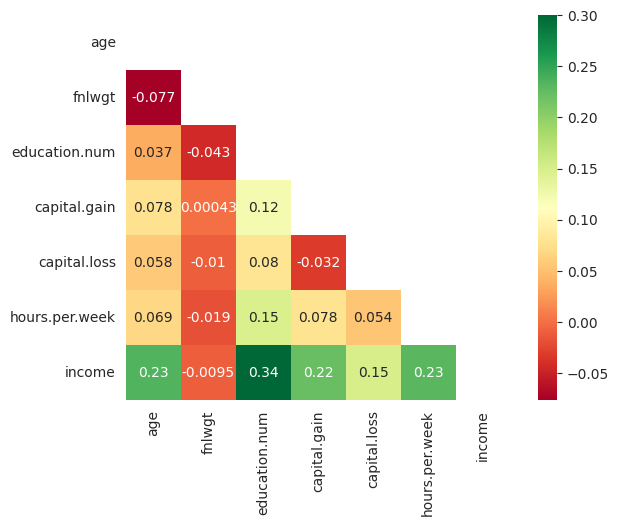

In [23]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

5. Prepare the dataset for modeling

Fixing '?' values in the dataset

In [24]:
dataset = dataset.replace('?', np.nan)

In [25]:
#TODO
#Check for missing values in each column of a dataset and returns the result as a string with two decimal places followed by ' %'.
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [26]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [27]:
for col in columns_with_nan:
    #TODO
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

Label encode all the categorical columns

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

Prepare independent variables X and dependent variable Y (Income).

In [30]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

Perform feature scaling using StandardScaler and fix the imbalance in the dataset using any one of the techniques like SMOTE or RandomOverSampler

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

Fixing imbalanced dataset using Oversampling

In [33]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [34]:
pip install imblearn


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: beakerx-base 2.0.1 has a non-standard dependency specifier ipywidgets<8pandas,>=7.5.1. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of beakerx-base or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
#TODO
#import the 'RandomOverSampler' class from the imblearn library
from imblearn.over_sampling import RandomOverSampler
#Then create an instance of RandomOverSampler named 'ros' with a specified random state of 42.
ros = RandomOverSampler(random_state = 42)

In [36]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [37]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [38]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

Perform a train test split in the ratio 80:20 and random_state 42.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [40]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 14)
X_test shape: (9888, 14)
Y_train shape: (39552,)
Y_test shape: (9888,)


6. Perform Data Modeling

1. Train Logistic Regression Model, KNN Classifier Model, SVM Classifier, Naive Bayes Classifier, Decision Tree Classifier and Random Forest Classifier

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [42]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [43]:
Y_pred_log_reg = log_reg.predict(X_test)

KNN Classifier

In [44]:
#TODO
#import the KNeighborsClassifier class from the sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
#initialize a k-Nearest Neighbors classifier (KNN) with the variable 'knn'
knn = KNeighborsClassifier()

In [45]:
#TODO
#Train a k-nearest neighbors (KNN) classifier
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [46]:
#TODO
from sklearn.metrics import accuracy_score
#Compute and store the predicted values in the variable 'Y_pred_knn' for the test data using the KNN model.
Y_pred_knn = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, Y_pred_knn)}")


Accuracy: 0.8358616504854369


Support Vector Classifier

In [47]:
#TODO
#import the Support Vector Classification (SVC) from the scikit-learn library
from sklearn import svm
#initialize an SVC model with a fixed random state of 42
model = svm.SVC(random_state = 42)

In [48]:
#TODO
# fit (training) a SVC model on the training data 'X_train' with corresponding label 'Y_train'.
model.fit(X_train, Y_train)

SVC(random_state=42)

In [49]:
#TODO
#Use the trained SVM classifier (svc) to predict labels for the test data (X_test), and the predicted labels are stored in the variable Y_pred_svc.
Y_pred_svc = model.predict(X_test)

Naive Bayes Classifier

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [51]:
nb.fit(X_train, Y_train)

GaussianNB()

In [52]:
Y_pred_nb = nb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_nb)}")

Accuracy: 0.6894215210355987


 Decision Tree Classifier

In [53]:
#TODO
#import the 'DecisionTreeClassifier' class from the 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier
#create an instance named 'dec_tree' and set the random_state parameter to 42.
dec_tree = DecisionTreeClassifier()

In [54]:
#TODO
#fit (training) a decision tree model to the training data
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [55]:
#TODO
#store the predictions in the variable 'Y_pred_dec_tree', made by a decision tree model 'dec_tree' on a set of test data 'X_test'.
Y_pred_dec_tree = dec_tree.predict(X_test)



Random Forest Classifier

In [56]:
#TODO
#import the 'RandomForestClassifier' class from the 'sklearn.ensemble' module
from sklearn.ensemble import RandomForestClassifier
#create an instance named 'ran_for' and set the random_state parameter to 42.
ran_for = RandomForestClassifier()

In [57]:
#TODO
#Fit a machine learning model using the 'X_train' dataset as input features and the corresponding 'Y_train' dataset as target labels.
ran_for.fit(X_train, Y_train)

RandomForestClassifier()

In [58]:
Y_pred_ran_for = ran_for.predict(X_test)

 Model Evaluation

 Perform model evaluation on Accuracy and F1 score and identify the best model

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [60]:
print('Logistic Regression:')

print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 76.7
F1 score: 76.61


In [61]:
#TODO
#print 'KNN Classifier' then show 'Accuracy score' and 'F1 score' also rounded to two decimal places
print("KNN Classifier")
print(f"Accuracy Score: {accuracy_score(Y_test, Y_pred_knn).round(2)}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_knn).round(2)}")

KNN Classifier
Accuracy Score: 0.84
F1 Score: 0.85


In [62]:
#TODO
#print 'Support vector classifier' then show 'Accuracy score' and 'F1 score' also rounded to two decimal places
print("Support vector classifier")
print(f"Accuracy Score: {accuracy_score(Y_test, Y_pred_svc).round(2)}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_svc).round(2)}")

Support vector classifier
Accuracy Score: 0.83
F1 Score: 0.84


In [63]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 68.94
F1 score: 59.0


In [64]:
#TODO
#print 'Decision tree classifier' then show 'Accuracy score' and 'F1 score' also rounded to two decimal places
print("Decision Tree Classifier")
print(f"Accuracy Score: {accuracy_score(Y_test, Y_pred_dec_tree).round(2)}")
print(f"F1 Score: {f1_score(Y_test, Y_pred_dec_tree).round(2)}")


Decision Tree Classifier
Accuracy Score: 0.92
F1 Score: 0.92


In [65]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 93.36
F1 score: 93.63


#### Observations

From various models scores, Random Forest Classifier stands out from other models.

Random Forest gives an accuracy score of 93.24% and F1 score of 93.52%

Hence we can choose Random Forest Classifier as our final model and we generate confusion matrix and classification report

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ran_for)

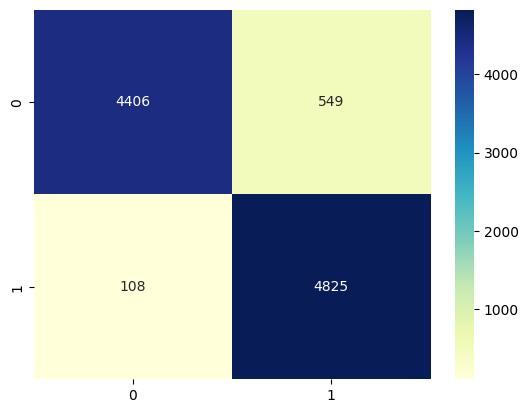

In [67]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [68]:
#TODO
# import the 'classification_report' function from the 'sklearn.metrics'.
# compare and print the true labels 'Y_test' and the predicted labels 'Y_pred_ran_for'.
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4955
           1       0.90      0.98      0.94      4933

    accuracy                           0.93      9888
   macro avg       0.94      0.93      0.93      9888
weighted avg       0.94      0.93      0.93      9888



<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier and random forest classifier.
</p></li>    

<li><p style="font-family:verdana;">
A random forest classifier gives the highest accuracy score of 93.24 and f1 score of 93.52.
</p></li>    
<li><p style="font-family:verdana;">
A DecisionTree classifier gives the accuracy score of 91.63 and f1 score of 92.04.
</p></li>   

<li><p style="font-family:verdana;">
The Confusion Matrix and Classification Report shows that Random Forest Model is able to classify both classes significantly accurate. The model needs improvement in predicting the class Income <50k because there are significantly larger number of false positives
</p></li>

<li><p style="font-family:verdana;">
Random forests are very flexible and give high accuracy as it overcomes the problem of overfitting by combining the results of multiple decision trees.
</p></li>
<li><p style="font-family:verdana;">
Random forests are more complex and computationally intensive than decision trees resulting in a time-consuming model building process. They are also harder to interpret and less intuitive than a decision tree.
</p></li>
</ul>


</div>